Step 1 : Creating the Dataset Using NumPy Arrays of 0s and
1s

In [1]:
# Creating data set
# A
a =[0, 0, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 0]
    # Creating labels
y =[[1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]]

Step 2 : Visualizing the Dataset

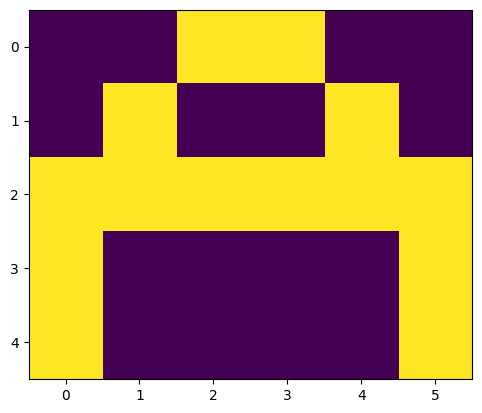

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

## Step 3 : As the data set is in the form of list we will convert it
into numpy array.**

In [3]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
np.array(c).reshape(1, 30)]
y = np.array(y)
# Printing data and labels
print(x, '\n\n', y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


## Step 4: Defining the Architecture of the Neural Network
-  Input Layer: 1 layer with 30 nodes (representing the 5x6 grid).
-  Hidden Layer: 1 layer with 5 nodes.
-  Output Layer: 1 layer with 3 nodes (representing the letters A, B,
and C)

## Step 5: Defining the Neural Network Functions

In [6]:
# activation function
def sigmoid(x):
  return(1/(1 + np.exp(-x)))
# Creating the Feed forward neural network

def f_forward(x, w1, w2):
# hidden
  z1 = x.dot(w1) # input from layer 1
  a1 = sigmoid(z1) # out put of layer 2
  z2 = a1.dot(w2) # input of out layer
  a2 = sigmoid(z2) # output of out layer
  return(a2)
# initializing the weights randomly

def generate_wt(x, y):
  li =[]
  for i in range(x * y):
    li.append(np.random.randn())
  return(np.array(li).reshape(x, y))

# for loss we will be using mean square error(MSE)
def loss(out, Y):
  s =(np.square(out-Y))
  s = np.sum(s)/len(y)
  return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
# hidden layer
  z1 = x.dot(w1)
  a1 = sigmoid(z1)
  z2 = a1.dot(w2)
  a2 = sigmoid(z2)

  d2 =(a2-y)
  d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
  (np.multiply(a1, 1-a1)))
  # Gradient for w1 and w2
  w1_adj = x.transpose().dot(d1)
  w2_adj = a1.transpose().dot(d2)
  # Updating parameters
  w1 = w1-(alpha*(w1_adj))
  w2 = w2-(alpha*(w2_adj))
  
  return(w1, w2)


## Step 6: Initializing Weights

In [5]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-8.62295005e-01  5.24764396e-01 -5.10433526e-01 -7.23900731e-01
  -1.77903176e+00]
 [ 3.93421312e-01 -3.03693285e-01  1.68783493e+00  1.16726063e+00
  -2.38296063e-01]
 [ 3.77625742e-01  3.64421967e-01 -3.66392605e-01  5.47501892e-01
   2.11584298e+00]
 [-2.88166534e-01  5.43295370e-01 -8.79215722e-01  5.10142671e-01
  -2.54018363e-01]
 [ 6.42205198e-01 -3.52635450e-01  1.23651500e+00 -1.69482144e+00
   1.05333773e+00]
 [-1.38230541e+00 -6.62230009e-01 -3.62825096e-01  2.33643059e+00
  -1.35883874e+00]
 [-2.26401341e-01 -2.71432535e-01 -2.41993093e+00  4.71945670e-02
  -6.80312347e-01]
 [ 3.53177492e-03  1.56250921e+00  1.56789542e+00  6.77713827e-01
  -7.52133121e-01]
 [-2.10856547e-01 -1.00602601e+00  5.99745851e-01  2.51295847e-01
  -9.51298346e-01]
 [ 2.13770390e-01  2.12588583e-01  8.03226487e-01 -1.21266542e+00
  -1.71101574e+00]
 [ 6.58154737e-01  1.14578284e+00  6.97556628e-01 -1.98634473e-01
   5.87294281e-01]
 [-2.33777941e-01  1.70528473e-04 -1.86077410e-01  2.08931833e+00

## Step 7: Training the Model

In [7]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
  acc =[]
  losss =[]
  for j in range(epoch):
    l =[]
    for i in range(len(x)):
      out = f_forward(x[i], w1, w2)
      l.append((loss(out, Y[i])))
      w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
      print("epochs:", j + 1, "======== acc:", (1- (sum(l)/len(x)))*100)
    acc.append((1-(sum(l)/len(x)))*100)
    losss.append(sum(l)/len(x))
  return(acc, losss, w1, w2)
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 73.64159087133166
epochs: 1 ======== acc: 62.94337325432886
epochs: 1 ======== acc: 52.25818746405009
epochs: 2 ======== acc: 75.86599685390823
epochs: 2 ======== acc: 66.40309056275152
epochs: 2 ======== acc: 56.5267748317952
epochs: 3 ======== acc: 78.82378471880726
epochs: 3 ======== acc: 70.57884303898155
epochs: 3 ======== acc: 61.179940775749955
epochs: 4 ======== acc: 81.93986498510255
epochs: 4 ======== acc: 74.52452119301525
epochs: 4 ======== acc: 65.34447391807869
epochs: 5 ======== acc: 84.61889696469511
epochs: 5 ======== acc: 77.614764464071
epochs: 5 ======== acc: 68.52319485169028
epochs: 6 ======== acc: 86.64075902443116
epochs: 6 ======== acc: 79.77998979846804
epochs: 6 ======== acc: 70.73025873834715
epochs: 7 ======== acc: 88.08053164548795
epochs: 7 ======== acc: 81.23179484414644
epochs: 7 ======== acc: 72.21577084901185
epochs: 8 ======== acc: 89.09572749017896
epochs: 8 ======== acc: 82.2060968276764
epochs: 8 ======== acc: 73.2300799520

## Step 8: Plotting Accuracy and Loss

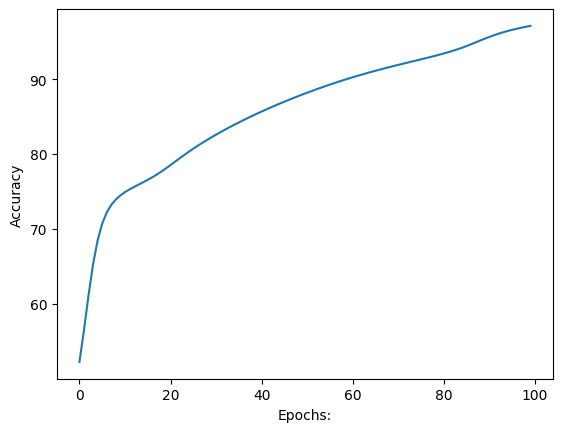

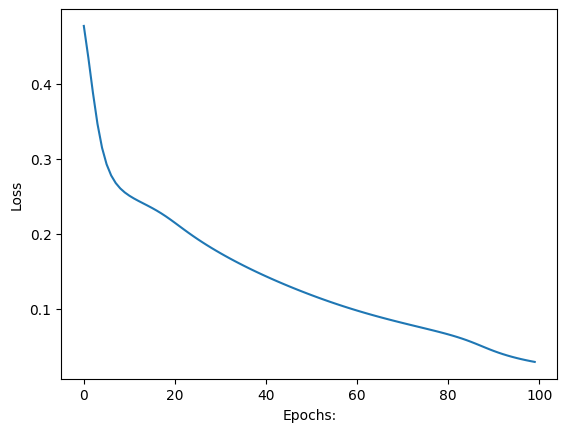

In [8]:
import matplotlib.pyplot as plt1
# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

## Step 9: Making Predictions

Image is of letter A.
Image is of letter B.
Image is of letter B.


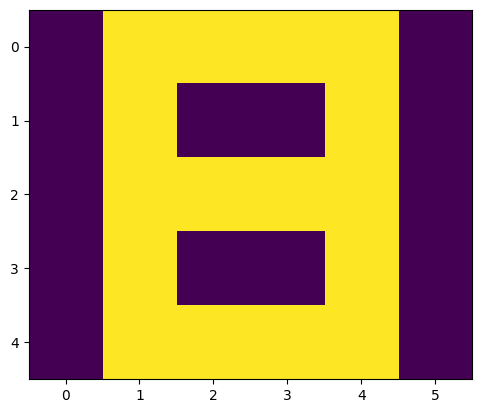

In [10]:
def predict(x, w1, w2):
  Out = f_forward(x, w1, w2)
  maxm = 0
  k = 0
  for i in range(len(Out[0])):
    if(maxm<Out[0][i]):
      maxm = Out[0][i]
      k = i
    if(k == 0):
      print("Image is of letter A.")
    elif(k == 1):
      print("Image is of letter B.")
    else:
      print("Image is of letter C.")
  plt.imshow(x.reshape(5, 6))
  plt.show()
# Example: Predicting for letter 'B'
predict(x[1], w1, w2)